In [4]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt

In [5]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [6]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

acerinox = df[df['empresa'] == 'Acerinox']

acerinox.shape

(1325, 10)

In [7]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

acerinox = acerinox [['date','open','high','low','close','adj close']]

acerinox.shape

(1325, 6)

In [8]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

acerinox['date'] = pd.to_datetime(acerinox['date'], format="%Y-%m-%d")

acerinox.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 2000 to 3324
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [9]:
# Paso 5: Ordenar el DF por fecha

acerinox.sort_values(by='date',ascending= True, inplace=True)

acerinox.head()

,date,open,high,low,close,adj close
2435,2019-01-02,8.640,8.642,8.350,8.582,5.994900
2436,2019-01-03,8.526,8.576,8.402,8.406,5.871956
2437,2019-01-04,8.516,8.898,8.510,8.882,6.204463
2438,2019-01-07,8.994,9.054,8.776,8.976,6.270126
2439,2019-01-08,8.968,9.340,8.968,9.200,6.426599


In [10]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acerinox = acerinox[(acerinox['date'] >= fecha_inicio) & (acerinox['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

acerinox.shape

(812, 6)

In [12]:
# Paso 8: Transformar serie temporal en ramdon forest

acerinox_rfr = acerinox[['date','close']]

acerinox_rfr

,date,close
3060,2021-01-04,9.294
3059,2021-01-05,9.312
3058,2021-01-06,9.538
3036,2021-01-07,9.820
3035,2021-01-08,9.712
...,...,...
2883,2024-02-26,10.230
2884,2024-02-27,10.400
2885,2024-02-28,10.200
2886,2024-02-29,10.135


In [16]:
acerinox_rfr.close = acerinox.close.round(2)

acerinox_rfr= acerinox_rfr.reset_index(drop=True)

acerinox_rfr

,date,close
0,2021-01-04,9.29
1,2021-01-05,9.31
2,2021-01-06,9.54
3,2021-01-07,9.82
4,2021-01-08,9.71
...,...,...
807,2024-02-26,10.23
808,2024-02-27,10.40
809,2024-02-28,10.20
810,2024-02-29,10.14


In [17]:
new_df = pd.DataFrame(columns=['d-4', 'd-3', 'd-2', 'd-1', 'do'])

new_df

,d-4,d-3,d-2,d-1,do


In [18]:
for i in range(len(new_df.columns)):
    new_df[new_df.columns[i]] = acerinox_rfr['close'].shift(-i)

In [19]:
new_df

,d-4,d-3,d-2,d-1,do
0,9.29,9.31,9.54,9.82,9.71
1,9.31,9.54,9.82,9.71,9.70
2,9.54,9.82,9.71,9.70,9.78
3,9.82,9.71,9.70,9.78,9.81
4,9.71,9.70,9.78,9.81,9.82
...,...,...,...,...,...
807,10.23,10.40,10.20,10.14,9.57
808,10.40,10.20,10.14,9.57,NaN
809,10.20,10.14,9.57,NaN,NaN
810,10.14,9.57,NaN,NaN,NaN


In [20]:
new_df.dropna(axis=0,inplace=True)

In [21]:
new_df

,d-4,d-3,d-2,d-1,do
0,9.29,9.31,9.54,9.82,9.71
1,9.31,9.54,9.82,9.71,9.70
2,9.54,9.82,9.71,9.70,9.78
3,9.82,9.71,9.70,9.78,9.81
4,9.71,9.70,9.78,9.81,9.82
...,...,...,...,...,...
803,10.16,10.28,10.36,10.26,10.23
804,10.28,10.36,10.26,10.23,10.40
805,10.36,10.26,10.23,10.40,10.20
806,10.26,10.23,10.40,10.20,10.14


In [22]:
from sklearn.ensemble import RandomForestRegressor as RFR 

rfr=RFR()

In [23]:
# Paso : Separar X e y para los modelos

X = new_df.drop('do',axis=1)

y = new_df.do 

In [24]:
from sklearn.model_selection import train_test_split as tts   


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((646, 4), (162, 4), (646,), (162,))

In [25]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
rfr.predict(X_test)[:10]

array([ 8.9915, 11.0723, 10.7384,  9.793 ,  9.6688, 10.6047, 11.8895,
       11.1372,  8.4964,  9.334 ])

In [27]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio


y_pred=rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

0.22562199308895425

In [28]:
%pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP

omp= OMP()


In [31]:
omp.fit(X_train, y_train)

OrthogonalMatchingPursuit()

In [32]:
omp.predict(X_test)[:10]

array([ 8.949609  , 11.0776489 , 10.72461002,  9.82239956,  9.67530003,
       10.54809059, 11.88179301, 11.08745554,  8.43966396,  9.27322797])

In [33]:
y_pred=omp.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

0.20798462361777012

In [34]:
new_df_1 = new_df[['d-4','d-3','d-2','d-1']]

new_df_1

,d-4,d-3,d-2,d-1
0,9.29,9.31,9.54,9.82
1,9.31,9.54,9.82,9.71
2,9.54,9.82,9.71,9.70
3,9.82,9.71,9.70,9.78
4,9.71,9.70,9.78,9.81
...,...,...,...,...
803,10.16,10.28,10.36,10.26
804,10.28,10.36,10.26,10.23
805,10.36,10.26,10.23,10.40
806,10.26,10.23,10.40,10.20


In [35]:
y_pred=omp.predict(new_df_1)

pred = pd.DataFrame(y_pred)

pred

,0
0,9.82
1,9.71
2,9.70
3,9.78
4,9.81
...,...
803,10.25
804,10.22
805,10.39
806,10.20


In [36]:
new_df['pred'] = pred

In [37]:
new_df

,d-4,d-3,d-2,d-1,do,pred
0,9.29,9.31,9.54,9.82,9.71,9.82
1,9.31,9.54,9.82,9.71,9.70,9.71
2,9.54,9.82,9.71,9.70,9.78,9.70
3,9.82,9.71,9.70,9.78,9.81,9.78
4,9.71,9.70,9.78,9.81,9.82,9.81
...,...,...,...,...,...,...
803,10.16,10.28,10.36,10.26,10.23,10.25
804,10.28,10.36,10.26,10.23,10.40,10.22
805,10.36,10.26,10.23,10.40,10.20,10.39
806,10.26,10.23,10.40,10.20,10.14,10.20


In [38]:
new_df.rename(columns={'do': 'real'}, inplace=True)



In [39]:
new_df['error'] = new_df.pred - new_df.real

new_df

,d-4,d-3,d-2,d-1,real,pred,error
0,9.29,9.31,9.54,9.82,9.71,9.82,0.11
1,9.31,9.54,9.82,9.71,9.70,9.71,0.01
2,9.54,9.82,9.71,9.70,9.78,9.70,-0.08
3,9.82,9.71,9.70,9.78,9.81,9.78,-0.03
4,9.71,9.70,9.78,9.81,9.82,9.81,-0.01
...,...,...,...,...,...,...,...
803,10.16,10.28,10.36,10.26,10.23,10.25,0.02
804,10.28,10.36,10.26,10.23,10.40,10.22,-0.18
805,10.36,10.26,10.23,10.40,10.20,10.39,0.19
806,10.26,10.23,10.40,10.20,10.14,10.20,0.06


In [40]:
acerinox_rfr

,date,close
0,2021-01-04,9.29
1,2021-01-05,9.31
2,2021-01-06,9.54
3,2021-01-07,9.82
4,2021-01-08,9.71
...,...,...
807,2024-02-26,10.23
808,2024-02-27,10.40
809,2024-02-28,10.20
810,2024-02-29,10.14


In [41]:
inicio_indice = 0
fin_indice = 807
acciona_rfr = acerinox_rfr.loc[inicio_indice:fin_indice]

In [42]:
acciona_rfr

,date,close
0,2021-01-04,9.29
1,2021-01-05,9.31
2,2021-01-06,9.54
3,2021-01-07,9.82
4,2021-01-08,9.71
...,...,...
803,2024-02-20,10.16
804,2024-02-21,10.28
805,2024-02-22,10.36
806,2024-02-23,10.26


In [43]:
new_df['date'] = acerinox_rfr.date


In [44]:
new_df

,d-4,d-3,d-2,d-1,real,pred,error,date
0,9.29,9.31,9.54,9.82,9.71,9.82,0.11,2021-01-04
1,9.31,9.54,9.82,9.71,9.70,9.71,0.01,2021-01-05
2,9.54,9.82,9.71,9.70,9.78,9.70,-0.08,2021-01-06
3,9.82,9.71,9.70,9.78,9.81,9.78,-0.03,2021-01-07
4,9.71,9.70,9.78,9.81,9.82,9.81,-0.01,2021-01-08
...,...,...,...,...,...,...,...,...
803,10.16,10.28,10.36,10.26,10.23,10.25,0.02,2024-02-20
804,10.28,10.36,10.26,10.23,10.40,10.22,-0.18,2024-02-21
805,10.36,10.26,10.23,10.40,10.20,10.39,0.19,2024-02-22
806,10.26,10.23,10.40,10.20,10.14,10.20,0.06,2024-02-23


In [45]:
new_df.insert(0, 'date', new_df.pop('date'))

In [46]:
new_df

,date,d-4,d-3,d-2,d-1,real,pred,error
0,2021-01-04,9.29,9.31,9.54,9.82,9.71,9.82,0.11
1,2021-01-05,9.31,9.54,9.82,9.71,9.70,9.71,0.01
2,2021-01-06,9.54,9.82,9.71,9.70,9.78,9.70,-0.08
3,2021-01-07,9.82,9.71,9.70,9.78,9.81,9.78,-0.03
4,2021-01-08,9.71,9.70,9.78,9.81,9.82,9.81,-0.01
...,...,...,...,...,...,...,...,...
803,2024-02-20,10.16,10.28,10.36,10.26,10.23,10.25,0.02
804,2024-02-21,10.28,10.36,10.26,10.23,10.40,10.22,-0.18
805,2024-02-22,10.36,10.26,10.23,10.40,10.20,10.39,0.19
806,2024-02-23,10.26,10.23,10.40,10.20,10.14,10.20,0.06


In [47]:
import matplotlib.pyplot as plt

In [48]:
new_df.error = new_df.error.astype(int)

In [49]:
new_df

,date,d-4,d-3,d-2,d-1,real,pred,error
0,2021-01-04,9.29,9.31,9.54,9.82,9.71,9.82,0
1,2021-01-05,9.31,9.54,9.82,9.71,9.70,9.71,0
2,2021-01-06,9.54,9.82,9.71,9.70,9.78,9.70,0
3,2021-01-07,9.82,9.71,9.70,9.78,9.81,9.78,0
4,2021-01-08,9.71,9.70,9.78,9.81,9.82,9.81,0
...,...,...,...,...,...,...,...,...
803,2024-02-20,10.16,10.28,10.36,10.26,10.23,10.25,0
804,2024-02-21,10.28,10.36,10.26,10.23,10.40,10.22,0
805,2024-02-22,10.36,10.26,10.23,10.40,10.20,10.39,0
806,2024-02-23,10.26,10.23,10.40,10.20,10.14,10.20,0


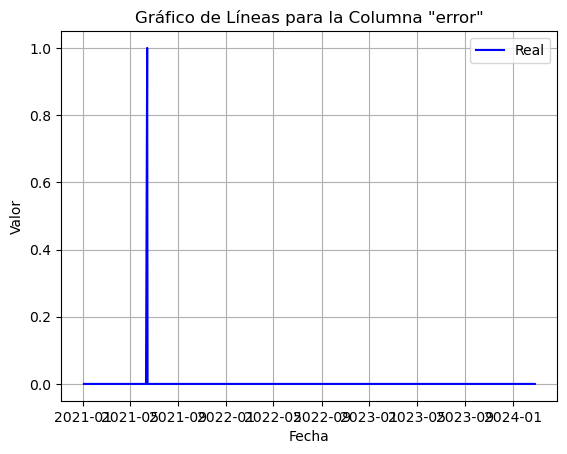

In [50]:
error_data = new_df['error']


# Crear un gráfico de líneas
plt.plot(new_df['date'], error_data, marker='None', linestyle='-', color='b', label='Real')

# Configuración del gráfico
plt.title('Gráfico de Líneas para la Columna "error"')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
condiciones = [
    (new_df['error'] == 0),
    (new_df['error'] >= 1),
    (new_df['error'] <= -1)
]

categorias = [0, 1, 2]

new_df['cate'] = np.select(condiciones, categorias, default=None)

In [52]:
new_df

,date,d-4,d-3,d-2,d-1,real,pred,error,cate
0,2021-01-04,9.29,9.31,9.54,9.82,9.71,9.82,0,0
1,2021-01-05,9.31,9.54,9.82,9.71,9.70,9.71,0,0
2,2021-01-06,9.54,9.82,9.71,9.70,9.78,9.70,0,0
3,2021-01-07,9.82,9.71,9.70,9.78,9.81,9.78,0,0
4,2021-01-08,9.71,9.70,9.78,9.81,9.82,9.81,0,0
...,...,...,...,...,...,...,...,...,...
803,2024-02-20,10.16,10.28,10.36,10.26,10.23,10.25,0,0
804,2024-02-21,10.28,10.36,10.26,10.23,10.40,10.22,0,0
805,2024-02-22,10.36,10.26,10.23,10.40,10.20,10.39,0,0
806,2024-02-23,10.26,10.23,10.40,10.20,10.14,10.20,0,0


In [53]:
catg = new_df[['date','d-4','d-3','d-2','d-1','real','cate']]

In [54]:
catg.to_csv('acerinox_class.csv',index=False)